## Read the files

In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv("train.csv")

In [3]:
df_test = pd.read_csv("test.csv")

## Exploring the training data

In [4]:
df_train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
x    700 non-null float64
y    699 non-null float64
dtypes: float64(2)
memory usage: 11.0 KB


# Fetching the missing row

In [6]:
df_train[df_train.isnull().any(axis=1)] # since y has missing data

,x,y
213,3530.157369,NaN


## Drop the row with missing data

In [7]:
df_train = df_train.dropna(axis = 0)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
x    699 non-null float64
y    699 non-null float64
dtypes: float64(2)
memory usage: 16.4 KB


## Visualizing the training data

In [9]:
import matplotlib.pyplot as plt

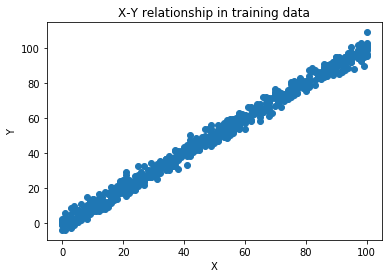

In [10]:
plt.scatter(df_train['x'], df_train['y'])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("X-Y relationship in training data")
plt.show()

## Exploring the test data

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
x    300 non-null int64
y    300 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


## Applying the linear regression algorithm - internally OLS

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
reg = LinearRegression()

In [14]:
reg.fit(df_train[['x']], df_train['y']) # X has to be a dataframe

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
y_pred = reg.predict(df_test[['x']])

## Checking the performance of Linear Regression

### Method 1 - visually on training data and testing data

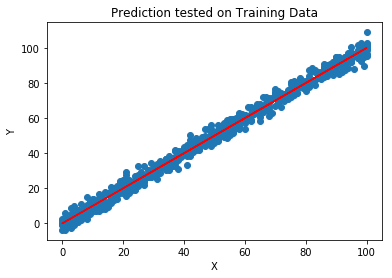

In [16]:
plt.scatter(df_train['x'],df_train['y'])
plt.plot(df_train['x'],reg.predict(df_train[['x']]), c = "red")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Prediction tested on Training Data")
plt.show()

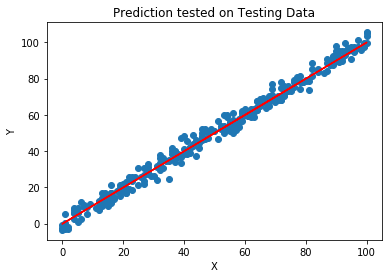

In [17]:
plt.scatter(df_test['x'],df_test['y'])
plt.plot(df_test['x'],y_pred, c = "red")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Prediction tested on Testing Data")
plt.show()

## Coefficients of Linear Model

In [18]:
reg.intercept_

-0.10726546430097272

In [19]:
reg.coef_

array([1.00065638])

## r2 score - Method 1 for calculating r2 score (Coefficient of determination)

In [20]:
reg.score(df_test[['y']], y_pred)

0.9883886222259362

## Method 2 of fetching r2 score

In [21]:
from scipy.stats import pearsonr

In [22]:
pearsonr_coeff, p_value = pearsonr(df_test['y'], y_pred)

In [23]:
pearsonr_coeff

0.9945453037143515

In [24]:
p_value

1.3255147116099292e-294

## RMSE for Model

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
import numpy as np

In [27]:
rmse_test = np.sqrt(mean_squared_error(df_test['y'],y_pred))

In [28]:
rmse_test

3.071306268029827

In [29]:
rmse_train = np.sqrt(mean_squared_error(df_train['y'],reg.predict(df_train[['x']])))

In [30]:
rmse_train

2.804951467225001

###### Not much difference between RMSE for training and test data, hence good fit

## Residual Plot

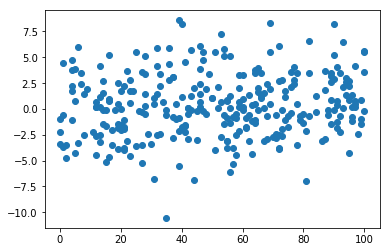

In [31]:
plt.scatter(df_test['x'], df_test['y'] - y_pred)
plt.show() # No pattern, hence perfect solution

## Other terminologies associated with Simple Linear Regression

In [32]:
RSS = np.square(df_test['y'] - y_pred).sum()

In [33]:
RSS

2829.8766576117914